

---

<center>
<h1>
Text Mining and Search Project

by L.Mauri, A.Vincenzi, E.Rebesco

</h1>
</center>


---



#Import pacchetti/librerie



---



In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [ ]:
import keras 
from keras import layers
from keras.models import Sequential
from tensorflow.keras import initializers

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from PIL import Image
from wordcloud import WordCloud 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Funzioni


---



In [ ]:
def plotClassesFrequency(dataframe,plotDim,column):
  plt.figure(figsize=plotDim)
  sns.countplot(dataframe[column],palette='coolwarm')
  plt.xlabel('classi',size=14)
  plt.ylabel('frequenza',size=14)

def _tfidfconverter(_dframe,use_idf = False):
    tfidfconverter = TfidfVectorizer(ngram_range=(1,2),use_idf = use_idf, stop_words='english')  
    x = tfidfconverter.fit_transform(_dframe['transformed_text']).toarray()
    y = _dframe['airline_sentiment_labels'].values
    return x, y


def plotTrainingResults(metric_train,metric_test):
  if metric_train == 'acc':
    plt.title('Accuracy')
  elif metric_train == 'loss' : 
    plt.title('Loss')
  plt.plot(modello.history[metric_train],label='training')
  plt.plot(modello.history[metric_test],label='test')
  plt.legend()


# Import dati 


---



**Augmented Dataframe**

In [ ]:
twitterReviewsBalanced_Aug = pd.read_csv('/content/drive/MyDrive/text mining and search/twitter sentiment/twitterReviewsBalanced_Aug.csv').iloc[:,1:]
twitterReviewsBalanced_Aug.shape

(10680, 4)

In [ ]:
twitterReviewsBalanced_Aug.groupby('airline_sentiment_labels').size()  # NOT augmented dataframe

airline_sentiment_labels
0.0    3560
1.0    3560
2.0    3560
dtype: int64

**NOT Augmented Dataframe**

In [ ]:
twitterReviewsBalanced_noAug = pd.read_csv('/content/drive/MyDrive/text mining and search/twitter sentiment/twitterReviewsBalanced_noAug.csv').iloc[:,1:]
twitterReviewsBalanced_noAug.shape

(7080, 4)

In [ ]:
twitterReviewsBalanced_noAug.groupby('airline_sentiment_labels').size()  # NOT augmented dataframe

airline_sentiment_labels
0    2360
1    2360
2    2360
dtype: int64

# Rappresentazione del testo 


---



* Costruzione matrice TF-IDF

* Feature Extraction SVD 

In [ ]:
X_aug,y_aug = _tfidfconverter(twitterReviewsBalanced_Aug,use_idf = True)  # Augmented 
X_noAug,y_noAug = _tfidfconverter(twitterReviewsBalanced_noAug,use_idf = True)  # NOT Augmented

### Feature Extraction SVD    


---



In [ ]:
svd = TruncatedSVD(n_components = 400, n_iter = 2, random_state = 1234)

X_svd_aug = svd.fit_transform(X_aug)
X_svd_noAug = svd.fit_transform(X_noAug)

In [ ]:
print(X_svd_noAug.shape)
X_svd_aug.shape

(7080, 400)


(10680, 400)

# Data Modeling


---

* Neural Network

* Random Forest

* Support Vector Machine (SVM)

## Augmented Dataframe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svd_aug, y_aug, test_size=0.2, 
                                                    random_state=1234)

### Neural Network

In [ ]:
input_dim = X_train.shape[1]
N_CLASSES = 3

model = Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(N_CLASSES, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = opt, 
              metrics = ['acc'])

In [ ]:
modello = model.fit(X_train,y_train,
                    epochs = 5,
                    validation_data = (X_test, y_test),
                    batch_size = 32 )

Epoch 1/5
267/267 [==============================] - 2s 4ms/step - loss: 1.0744 - acc: 0.4049 - val_loss: 0.8635 - val_acc: 0.6751
Epoch 2/5
267/267 [==============================] - 1s 3ms/step - loss: 0.8628 - acc: 0.6071 - val_loss: 0.7203 - val_acc: 0.7163
Epoch 3/5
267/267 [==============================] - 1s 3ms/step - loss: 0.7594 - acc: 0.6717 - val_loss: 0.6784 - val_acc: 0.7303
Epoch 4/5
267/267 [==============================] - 1s 3ms/step - loss: 0.6973 - acc: 0.7151 - val_loss: 0.6589 - val_acc: 0.7416
Epoch 5/5
267/267 [==============================] - 1s 3ms/step - loss: 0.6677 - acc: 0.7277 - val_loss: 0.6475 - val_acc: 0.7374


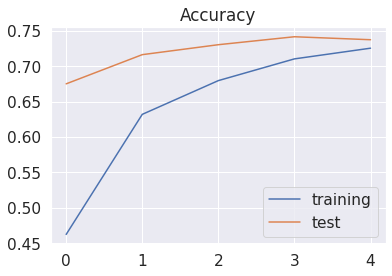

In [ ]:
plotTrainingResults(metric_train = 'acc', metric_test= 'val_acc')

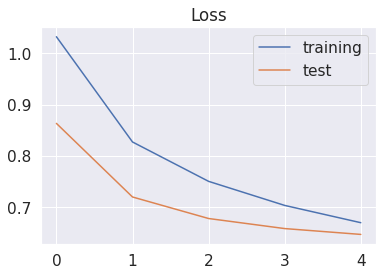

In [ ]:
plotTrainingResults(metric_train = 'loss', metric_test= 'val_loss')

### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=1234, n_jobs = -1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rf_score=clf.score(X_test,y_test)
rf_score

0.7139513108614233

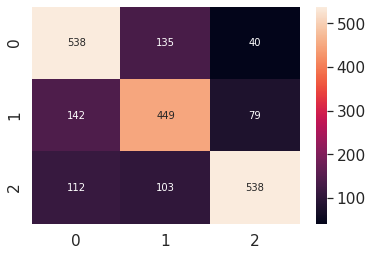

In [ ]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = predictions), annot = True,fmt = 'g',annot_kws = {'size' : 10 })
#if text == 'positive' : return 2 
#elif text == 'neutral' : return 1
#elif text == 'negative' : return 0 

In [ ]:
print(classification_report(y_true = y_test,y_pred = predictions ) )

              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       713
         1.0       0.65      0.67      0.66       670
         2.0       0.82      0.71      0.76       753

    accuracy                           0.71      2136
   macro avg       0.72      0.71      0.71      2136
weighted avg       0.72      0.71      0.72      2136



### Support Vector Machine

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76       713
         1.0       0.69      0.77      0.73       670
         2.0       0.84      0.78      0.81       753

    accuracy                           0.77      2136
   macro avg       0.77      0.77      0.77      2136
weighted avg       0.77      0.77      0.77      2136



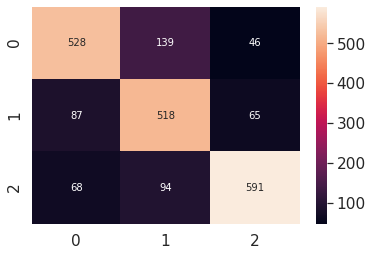

In [ ]:
clf = SVC().fit(X_train,y_train)

pred = clf.predict(X_test)
print(metrics.classification_report(y_test,pred))


confusionMatrix = confusion_matrix(y_true = y_test,y_pred = pred ) 
sns.set(font_scale = 1.4)
sns.heatmap(confusionMatrix,annot = True , fmt= 'g', annot_kws = {'size' : 10 })

In [ ]:
print(classification_report(y_true = y_test,y_pred = pred ) )

              precision    recall  f1-score   support

         0.0       0.77      0.74      0.76       713
         1.0       0.69      0.77      0.73       670
         2.0       0.84      0.78      0.81       753

    accuracy                           0.77      2136
   macro avg       0.77      0.77      0.77      2136
weighted avg       0.77      0.77      0.77      2136



## NOT Augmented Dataframe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_svd_noAug, y_noAug, test_size=0.2, 
                                                    random_state=1234)

### Neural Network

In [ ]:
input_dim = X_train.shape[1]
N_CLASSES = 3

model = Sequential()
model.add(layers.Dense(128, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(N_CLASSES, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = opt, 
              metrics = ['acc'])

In [ ]:
modello = model.fit(X_train,y_train,
                    epochs = 5,
                    validation_data = (X_test, y_test),
                    batch_size = 32 )

Epoch 1/5
177/177 [==============================] - 2s 5ms/step - loss: 1.0895 - acc: 0.3848 - val_loss: 0.9877 - val_acc: 0.6525
Epoch 2/5
177/177 [==============================] - 1s 3ms/step - loss: 0.9599 - acc: 0.5467 - val_loss: 0.7882 - val_acc: 0.6914
Epoch 3/5
177/177 [==============================] - 1s 3ms/step - loss: 0.8137 - acc: 0.6406 - val_loss: 0.7234 - val_acc: 0.7097
Epoch 4/5
177/177 [==============================] - 1s 3ms/step - loss: 0.7277 - acc: 0.6844 - val_loss: 0.7051 - val_acc: 0.7006
Epoch 5/5
177/177 [==============================] - 0s 3ms/step - loss: 0.7079 - acc: 0.7060 - val_loss: 0.7021 - val_acc: 0.6977


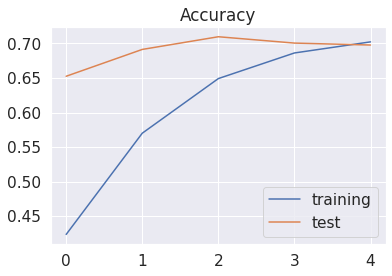

In [ ]:
plotTrainingResults(metric_train = 'acc', metric_test= 'val_acc')

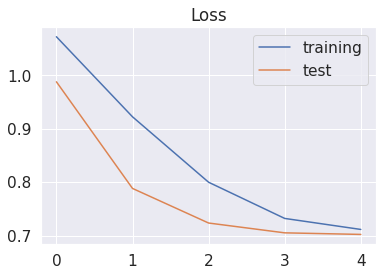

In [ ]:
plotTrainingResults(metric_train = 'loss', metric_test= 'val_loss')

### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=1234, n_jobs = -1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
rf_score=clf.score(X_test,y_test)
rf_score

0.6299435028248588

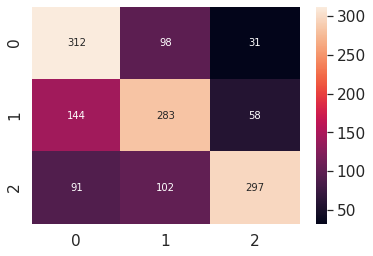

In [ ]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = predictions), annot = True,fmt = 'g', annot_kws = {'size' : 10 })
#if text == 'positive' : return 2 
#elif text == 'neutral' : return 1
#elif text == 'negative' : return 0 

In [ ]:
print(classification_report(y_true = y_test,y_pred = predictions ) )

              precision    recall  f1-score   support

           0       0.57      0.71      0.63       441
           1       0.59      0.58      0.58       485
           2       0.77      0.61      0.68       490

    accuracy                           0.63      1416
   macro avg       0.64      0.63      0.63      1416
weighted avg       0.64      0.63      0.63      1416



### Support Vector Machine

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       441
           1       0.63      0.73      0.67       485
           2       0.82      0.70      0.76       490

    accuracy                           0.71      1416
   macro avg       0.72      0.71      0.71      1416
weighted avg       0.72      0.71      0.71      1416



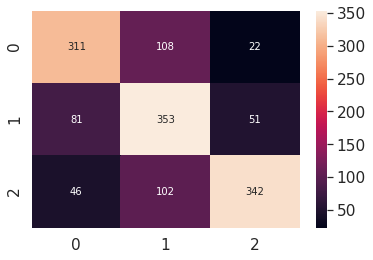

In [ ]:
clf = SVC().fit(X_train,y_train)

pred = clf.predict(X_test)
print(metrics.classification_report(y_test,pred))


confusionMatrix = confusion_matrix(y_true = y_test,y_pred = pred ) 
sns.set(font_scale = 1.4)
sns.heatmap(confusionMatrix,annot = True , fmt= 'g', annot_kws = {'size' : 10 })

In [ ]:
print(classification_report(y_true = y_test,y_pred = pred ) )

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       441
           1       0.63      0.73      0.67       485
           2       0.82      0.70      0.76       490

    accuracy                           0.71      1416
   macro avg       0.72      0.71      0.71      1416
weighted avg       0.72      0.71      0.71      1416



# Extra 

### WordCloud 


---



In [ ]:

df = twitterReviewsBalanced_noAug.copy()
df_neg = df[df.airline_sentiment_labels == 0]

text = " ".join([i for i in df_neg.transformed_text])

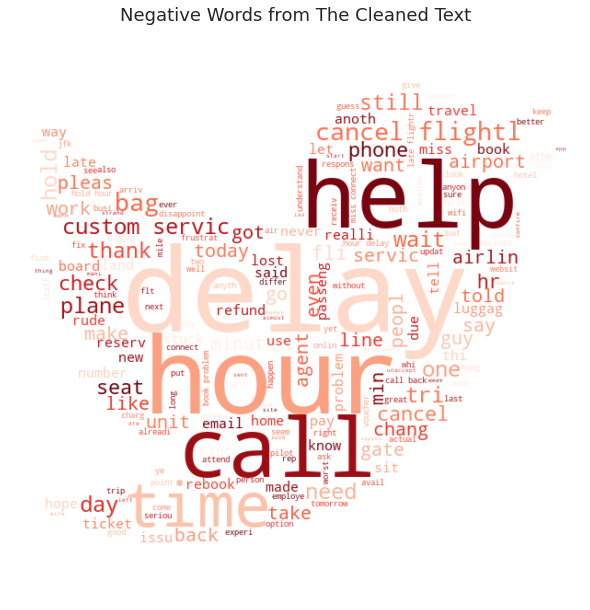

In [ ]:
twitter_mask = np.array(Image.open("/content/social-twitter-bird-symbol_318-27588.jpg"))
stopwords = nltk.corpus.stopwords.words('english')
stopwords=set(stopwords)
stopwords.update(['flight','get'])
wc = WordCloud(stopwords=stopwords,width=1600, height=800,background_color="white", colormap="Reds",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words from The Cleaned Text', fontsize=18)
plt.show()

In [ ]:
df = twitterReviewsBalanced_noAug.copy()
df_neg = df[df.airline_sentiment_labels == 2]
text = " ".join([i for i in df_neg.transformed_text])

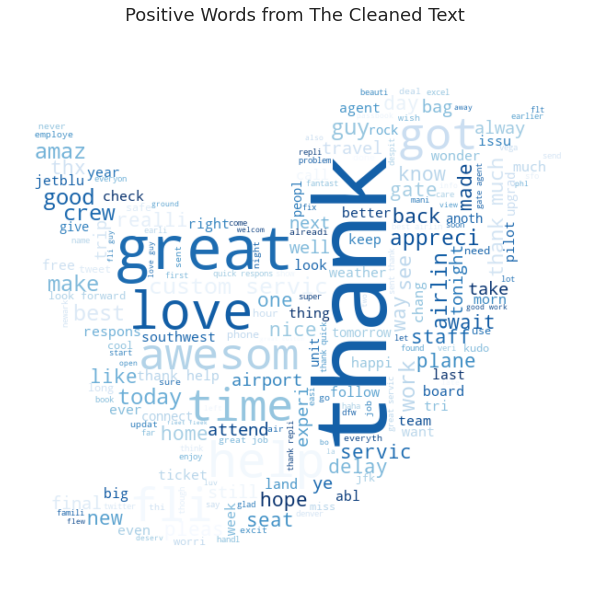

In [ ]:
twitter_mask = np.array(Image.open("/content/social-twitter-bird-symbol_318-27588.jpg"))
stopwords = nltk.corpus.stopwords.words('english')
stopwords=set(stopwords)
stopwords.update(['flight','get'])
wc = WordCloud(stopwords=stopwords,width=1600, height=800,background_color="white", colormap="Blues",mask=twitter_mask).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words from The Cleaned Text', fontsize=18)
plt.show()